In [ ]:
import torch
from torch import tensor
from scipy.io import loadmat
import matplotlib.pyplot as plt
# from Darcy_CNN import *
from Darcy_FNO import *
# torch.set_default_tensor_type(torch.DoubleTensor)
from utils import *
import h5py
import numpy as np

/scratches/kolmogorov_2/kk753/miniconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
if torch.cuda.is_available():
    for i in range(torch.cuda.device_count()):
        print(f"Device {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")

Device 0: NVIDIA GeForce RTX 2080 Ti
Device 1: NVIDIA GeForce RTX 2080 Ti


In [3]:
device = torch.device('cpu') # torch.device('cuda:1' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
# print(f"Device name: {torch.cuda.get_device_name(device)}")
# print(f"Device capability: {torch.cuda.get_device_capability(device)}")
# print(f"Device properties: {torch.cuda.get_device_properties(device)}")

Using device: cpu


In [41]:
file_path = 'Darcy_2D_data_train.mat'

A = 0
U = 0
with h5py.File(file_path, 'r') as data:
    U = tensor(data['u_field'], dtype=torch.float32)  # Show available datasets
    A = tensor(data['a_field'], dtype=torch.float32)  # Show available datasets

In [42]:
U = U.permute(2, 0, 1).unsqueeze(1)
A = A.permute(2, 0, 1).unsqueeze(1)

In [43]:
U.shape, U.dtype

(torch.Size([1000, 1, 32, 32]), torch.float32)

In [44]:
u_normalizer = UnitGaussianNormalizer(U)
a_normalizer = UnitGaussianNormalizer(A)
U = u_normalizer.encode(U)
A = a_normalizer.encode(A)

In [45]:
A.dtype

torch.float32

In [57]:
dir = 'trained models FNO/2025-03-16 15:13:21/'

In [58]:
net = FNO(10, 6, 26, device)
net.load_state_dict(torch.load(dir+'model.pth'))

/tmp/ipykernel_31275/2831252750.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(dir+'model.pth'))


<All keys matched successfully>

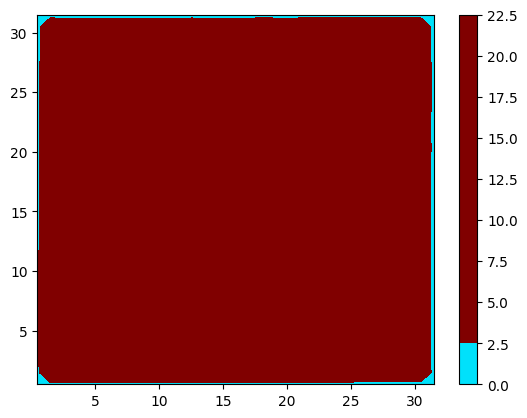

In [59]:
plt.contourf(u_normalizer.decode(net(A[0])).squeeze(0,1).detach().numpy(), origin='lower', cmap='jet', levels=8, vmax = 3.6)
plt.colorbar()
# plt.title('Contour Plot')
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
plt.show()

In [60]:
u_normalizer.std.shape

torch.Size([1, 32, 32])

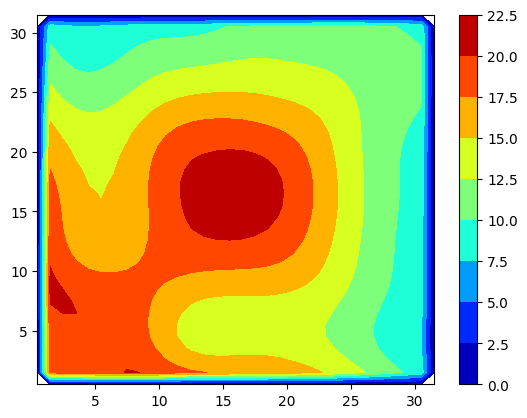

In [61]:
plt.contourf(U[0].squeeze(0,1).detach().numpy(), origin='lower', cmap='jet', levels=8)
plt.colorbar()  

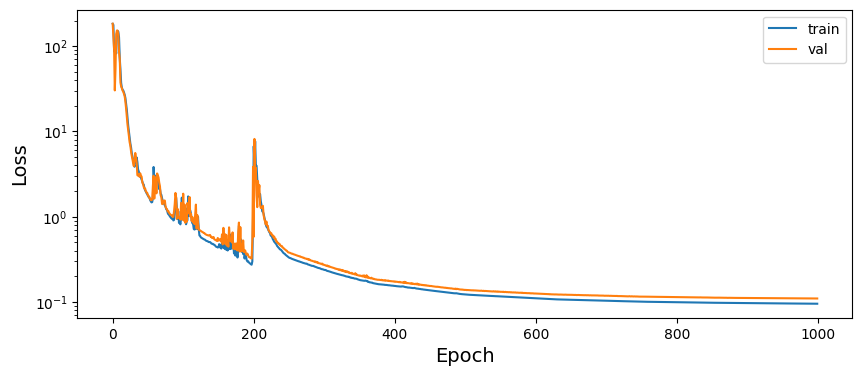

In [64]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
loss_train = np.load(dir+'train_loss.npy', allow_pickle=True)
loss_val = np.load(dir+'test_loss.npy', allow_pickle=True)
plt.plot(loss_train[:], label='train')
plt.plot(loss_val[:], label='val')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.yscale('log')
plt.legend()